# testes em python

In [2]:
os.system('ls')

NameError: name 'os' is not defined

In [3]:
import os

In [4]:
os.system('ls')

backend-mvp-puc
colap
desenvolvimento-full-stack-puc
frontend-mvp-puc
pnad_estudo_lf.ipynb
testes em python.ipynb


0

In [6]:
os.system('mkdir --h')

mkdir: illegal option -- -
usage: mkdir [-pv] [-m mode] directory_name ...


16384

In [7]:
os.system('mkdir -p "ans"')

0

In [8]:
os.system('ls')

ans
backend-mvp-puc
colap
desenvolvimento-full-stack-puc
frontend-mvp-puc
pnad_estudo_lf.ipynb
teste
testes em python.ipynb


0

In [9]:
import wget

ModuleNotFoundError: No module named 'wget'

In [10]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=5661ef40ec95f977f34b2e286e04d15c2408bb27604c39a1ee03e971cef85081
  Stored in directory: /Users/luisfrade/Library/Caches/pip/wheels/46/78/0e/8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [11]:
import wget

In [4]:
import basedosdados as bd

In [28]:
bd.read_table(dataset_id='br_ibge_ipca',table_id='mes_brasil', billing_project_id="pnad-estudo-lf")

Downloading: 100%|████████████████████████| 521/521 [00:00<00:00, 1195.52rows/s]


,ano,mes,indice,variacao_mensal,variacao_trimestral,variacao_semestral,variacao_anual,variacao_doze_meses
0,2014,1,3836.370000,0.55,2.02,3.21,0.55,5.59
1,1997,1,1379.330000,1.18,1.98,2.89,1.18,9.39
2,2008,1,2746.370000,0.54,1.67,2.64,0.54,4.56
3,2013,1,3633.440000,0.86,2.27,3.88,0.86,6.15
4,1989,1,0.000214,37.49,126.39,340.71,37.49,1149.22
...,...,...,...,...,...,...,...,...
516,2008,12,2892.860000,0.28,1.09,2.18,5.90,5.90
517,2015,12,4493.170000,0.96,2.82,4.24,10.67,10.67
518,2019,12,5320.250000,1.15,1.77,2.03,4.31,4.31
519,2010,5,3110.740000,0.43,1.53,3.47,3.09,5.22


In [5]:
# inflação mes a mes
query = """
SELECT CONCAT(mes, "-", ano) mes, variacao_mensal
FROM `basedosdados.br_ibge_ipca.mes_brasil`
WHERE ano < 1994
ORDER BY ano, mes ASC
"""

df = bd.read_sql(query, billing_project_id="pnad-estudo-lf")
df

Downloading: 100%|█████████████████████████| 169/169 [00:00<00:00, 459.07rows/s]


,mes,variacao_mensal
0,12-1979,NaN
1,1-1980,6.62
2,10-1980,9.48
3,11-1980,6.67
4,12-1980,6.61
...,...,...
164,5-1993,27.69
165,6-1993,30.07
166,7-1993,30.72
167,8-1993,32.96


In [58]:
import matplotlib.pyplot as plt

<Axes: xlabel='mes'>

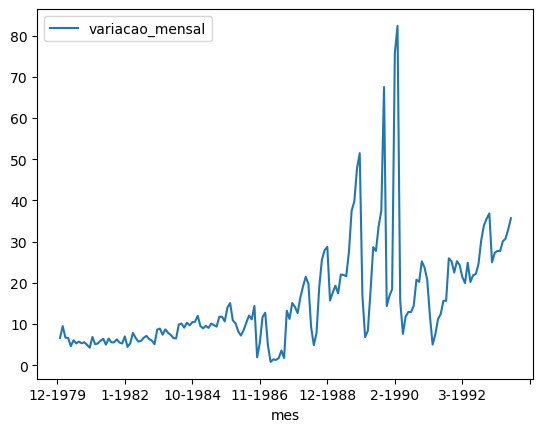

In [83]:
df.plot(x="mes", y="variacao_mensal")

In [84]:
df.mean()

variacao_mensal    15.488571
dtype: float64

In [158]:
df.std()

variacao_mensal    12.768293
dtype: float64

In [86]:
df.median()

variacao_mensal    11.205
dtype: float64

In [162]:
def std_na_mao():
    df['variacao_mensal'][0] = 0
    variacao_mensal_var = df['variacao_mensal']
    print(f"media {variacao_mensal_var.mean()}")
    counteri = 0
    for i in variacao_mensal_var:
        counteri += (i - variacao_mensal_var.mean())**2
    print(f"resultado std {(counteri/variacao_mensal_var.count())**(1/2)}")
        
std_na_mao()

media 15.396923076923077
resultado std 12.73046079105791


<Axes: ylabel='Frequency'>

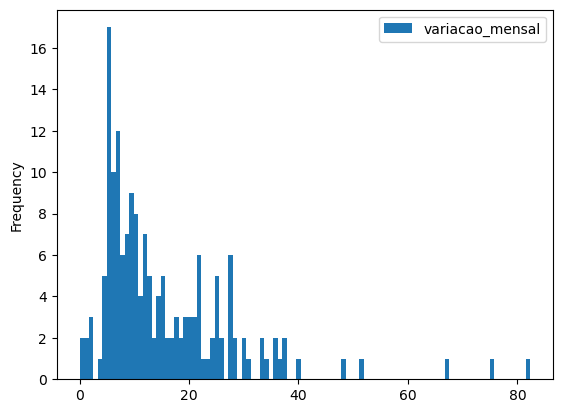

In [168]:
df.plot.hist(bins=100)

In [8]:
df.download()

AttributeError: 'DataFrame' object has no attribute 'download'

In [17]:
savepath="df2.csv"
query = """
SELECT CONCAT(mes, "-", ano) mes, variacao_mensal
FROM `basedosdados.br_ibge_ipca.mes_brasil`
WHERE ano < 1994
ORDER BY ano, mes ASC
"""
df2 = bd.download(query=query, savepath=savepath, billing_project_id="pnad-estudo-lf")

# PNAD por região

In [33]:
query = """
SELECT *
FROM `basedosdados.br_ibge_pnad.microdados_compatibilizados_pessoa`
LIMIT 100

"""

pnad_bd = bd.read_sql(query, billing_project_id="pnad-estudo-lf")
pnad_bd

Downloading: 100%|█████████████████████████| 100/100 [00:00<00:00, 255.41rows/s]


,ano,id_regiao,id_uf,sigla_uf,id_domicilio,regiao_metropolitana,numero_familia,ordem,condicao_domicilio,condicao_familia,...,renda_mensal_produto_mercadoria_outra_deflacionado,renda_mensal_ocupacao_principal_deflacionado,renda_mensal_todos_trabalhos_deflacionado,renda_mensal_todas_fontes_deflacionado,renda_mensal_familia_deflacionado,renda_aposentadoria_deflacionado,renda_pensao_deflacionado,renda_abono_deflacionado,renda_aluguel_deflacionado,renda_outras_deflacionado
0,1981,2,27,AL,198157001001,0,1,1,1,1,...,NaN,857.0,857.0,857.0,1314.0,NaN,NaN,NaN,NaN,NaN
1,1981,2,27,AL,198157001002,0,1,1,1,1,...,NaN,286.0,286.0,286.0,857.0,NaN,NaN,NaN,NaN,NaN
2,1981,2,27,AL,198157001003,0,1,1,1,1,...,NaN,457.0,457.0,457.0,457.0,NaN,NaN,NaN,NaN,NaN
3,1981,2,27,AL,198157001004,0,1,1,1,1,...,NaN,574.0,574.0,574.0,826.0,NaN,NaN,NaN,NaN,NaN
4,1981,2,27,AL,198157001005,0,1,1,1,1,...,NaN,343.0,343.0,343.0,343.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1981,2,27,AL,198157007913,0,1,1,1,1,...,NaN,10286.0,10286.0,10286.0,10286.0,NaN,NaN,NaN,NaN,NaN
96,1981,2,27,AL,198157007914,0,1,1,1,1,...,NaN,11429.0,11429.0,21784.0,21784.0,8572.0,NaN,NaN,NaN,1783.0
97,1981,2,27,AL,198157007915,0,1,1,1,1,...,NaN,663.0,663.0,663.0,663.0,NaN,NaN,NaN,NaN,NaN
98,1981,2,27,AL,198157007916,0,1,1,1,1,...,NaN,17144.0,17144.0,20573.0,42222.0,NaN,NaN,NaN,3429.0,NaN


In [54]:
query = """
SELECT ano, id_regiao, AVG(renda_mensal_todas_fontes_deflacionado) as renda_principal
FROM `basedosdados.br_ibge_pnad.microdados_compatibilizados_pessoa`
GROUP BY ano, id_regiao
ORDER BY ano, id_regiao ASC
"""

pnad_bd2 = bd.read_sql(query, billing_project_id="pnad-estudo-lf")

Downloading: 100%|█████████████████████████| 147/147 [00:00<00:00, 375.13rows/s]


In [41]:
savepath="pnad_renda_principal_por_ano_regiao_2.csv"
query = """
SELECT ano, id_regiao, AVG(renda_mensal_todas_fontes_deflacionado) as renda_principal
FROM `basedosdados.br_ibge_pnad.microdados_compatibilizados_pessoa`
GROUP BY ano, id_regiao
ORDER BY ano, id_regiao ASC
"""
pnad_renda_principal_por_ano_regiao_2 = bd.download(query=query, savepath=savepath, billing_project_id="pnad-estudo-lf")

# analisando pnad por regiao

In [151]:
query = """
SELECT ano, id_regiao, AVG(renda_mensal_todas_fontes_deflacionado) as renda_principal
FROM `basedosdados.br_ibge_pnad.microdados_compatibilizados_pessoa`
GROUP BY ano, id_regiao
ORDER BY ano, id_regiao ASC
"""

pnad_bd2 = bd.read_sql(query, billing_project_id="pnad-estudo-lf")
pnad_bd2


Downloading: 100%|█████████████████████████| 147/147 [00:00<00:00, 415.22rows/s]


,ano,id_regiao,renda_principal
0,1981,1,1346.093623
1,1981,2,954.291961
2,1981,3,1578.145017
3,1981,4,1514.080444
4,1981,5,1591.423138
...,...,...,...
142,2015,1,NaN
143,2015,2,NaN
144,2015,3,NaN
145,2015,4,NaN


In [48]:
query = """
SELECT ano, id_regiao, AVG(renda_mensal_todas_fontes_deflacionado) as renda_principal
FROM `basedosdados.br_ibge_pnad.microdados_compatibilizados_pessoa`
GROUP BY ano, id_regiao
ORDER BY ano, id_regiao ASC
"""

pnad_bd2 = bd.read_sql(query, billing_project_id="pnad-estudo-lf")
pnad_bd2

Downloading: 100%|█████████████████████████| 100/100 [00:00<00:00, 244.11rows/s]


,ano,id_regiao,renda_principal
0,1981,1,1346.093623
1,1981,2,954.291961
2,1981,3,1578.145017
3,1981,4,1514.080444
4,1981,5,1591.423138
...,...,...,...
95,2004,4,1317.340725
96,2004,5,1280.143730
97,2005,1,939.675528
98,2005,2,779.161467


10

<class 'int'>
